# AT1B - NLP for VIRATrust data analysis
Author: Kritika Dhawale <br>
Date: 24th March 2023 <br>
Student ID: 24587661

## Goal:

1. To identify patterns in the types of questions or concerns that people have about COVID-19 vaccines
2. Understanding the different factors that contribute to trust or mistrust about COVID-19 vaccines in human-chatbot conversations.

## Audience:
1. General Public
2. Healthcare Professionals

### Few Research Questions that can be taken into account while analysing this data

       For the general public:

1. What are the most common concerns or questions about COVID-19 vaccines?
2. What are some misconceptions about COVID-19 vaccines that need to be addressed?
3. What are some effective strategies for communicating the benefits of COVID-19 vaccines to the public?
4. How can we use the data to create a clear and engaging narrative that effectively communicates the insights from the data to the public?

       For healthcare professionals:

1. What are the most common medical concerns or questions about COVID-19 vaccines?
2. How can we address common misconceptions among patients about COVID-19 vaccines?
3. What implications does the data have for patient care and vaccine education?
4. What are the most effective ways to build trust in COVID-19 vaccines among patients and the public?

### Some information on the VIRATrust dataset: 

The Trust Classification dataset (Roni Friedman, 2022) can be used to identify user trust about the COVID-19 vaccines. It includes annotations for High trust, Low institutional trust, and Low agent trust in user inputs to VIRA chatbot.

The dataset is split into 3 files (train, test and dev) but I will be combining them all to perform EDA as we are not training any classifier in this task. It has two columns:
1. User input as text 
2. Trust label categorised into 4 levels <br>
    0 - Low Institutional Trust <br>
	1 - Low Agent Trust <br>
	2 - Neutral <br>
	3 - High Trust 
    
### 1. Data Preparation:

<b>1.1 Read in the data from the train.csv, dev.csv, and test.csv files. </b>

In [1]:
# Importing necessary libraries to read data and visualize
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Reading all the csv files into 3 variables
trust_train = pd.read_csv('./AT1B Datasets/IBM_Debater_(R)_trust_data/data/train.csv')
trust_test = pd.read_csv('./AT1B Datasets/IBM_Debater_(R)_trust_data/data/test.csv')
trust_dev = pd.read_csv('./AT1B Datasets/IBM_Debater_(R)_trust_data/data/dev.csv')


In [3]:
# Combining these 3 dataframes into one for broader visualization scope
trust_merged = pd.concat([trust_train, trust_test, trust_dev], ignore_index=True, sort=False)


In [4]:
# printing 10 samples from the dataset
pd.set_option('max_colwidth', 800) #This will set the display width of the column to 800 and 
#we can see more of the input text
trust_merged.sample(10)         


,text,label
2675,when can i get the moderna booster,3
258,Isn't it true that the vaccines could have unknown side effects which will not manifest for years,0
978,Does COVID produces much greater immunity than any of the vaccines?,2
284,Is the vaccination safe?,0
1436,breast feeding,2
802,What's S-2P antigen?,2
2988,When should I get a booster vaccine?,3
330,What are the side effects of covid vaccines,0
350,What side effects does the vaccine have?,0
861,Do you have work at the Chautauqua Care center,2


It's also worth noting that the text appears to contain worries about potential side effects, the effectiveness of the vaccines, and conspiracy theories about microchips. This suggests that the ViraTrust dataset could be a valuable resource to achieve our goal.

In [5]:
# Print the shape of the merged data, see how many user inputs we have
trust_merged.shape


(3022, 2)

<b> 1.2 Explore the data to gain an understanding of the distribution of trust labels (0, 1, 2, 3) </b>

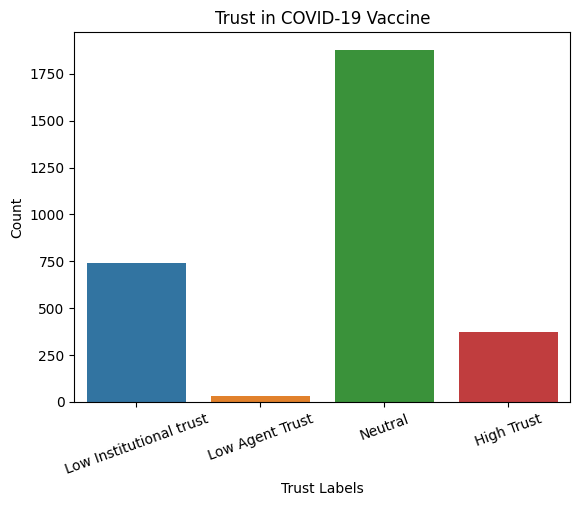

In [6]:
# Count the number of each trust label
trust_counts = trust_merged['label'].value_counts()

# Create a bar plot using Seaborn
ax = sns.barplot(x=trust_counts.index, y=trust_counts.values)
ax.set_xticklabels(['Low Institutional trust', 'Low Agent Trust', 'Neutral', 'High Trust'], rotation=20)
# Set the plot title and axis labels
plt.title('Trust in COVID-19 Vaccine')
plt.xlabel('Trust Labels')
plt.ylabel('Count')

# Show the plot
plt.show()

The above bar graph shows that most of the people have neutral reviews on the COVID-19 vaccine from the chatbot dataset, following by certain groups of people having zero trust and high level trust in the vaccine.

<b>Counting words</b> in each text row and adding it in a separate column to keep a check on the length of questions

In [7]:
# defining a function that counts the no. of words in the text
def word_count(text):
    wc = len(text.split())
    return wc

# applying the function to the dataframe and adding thw word count in a column named "text_word_count"
trust_merged['text_word_count'] = trust_merged['text'].apply(word_count)

[Text(0, 0, 'Low Institutional trust'),
 Text(1, 0, 'Low Agent Trust'),
 Text(2, 0, 'Neutral'),
 Text(3, 0, 'High Trust')]

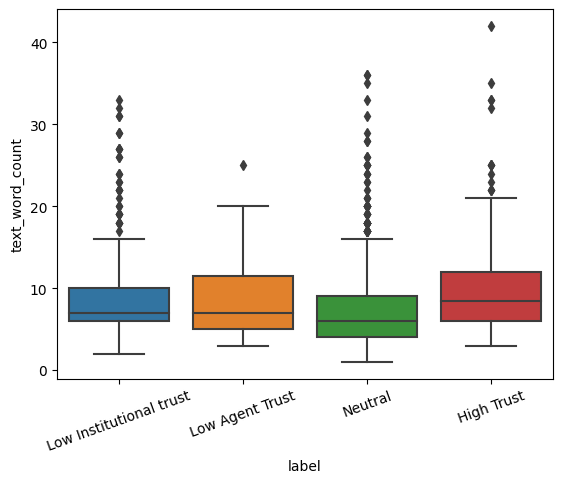

In [8]:
# Plotting box plot to see the length of questions asked for each trust label
ax = sns.boxplot(x = "label", 
            y = "text_word_count",
            data = trust_merged);

# set the x-axis tick labels
ax.set_xticklabels(['Low Institutional trust', 'Low Agent Trust', 'Neutral', 'High Trust'], rotation=20)

The box plot represents that the neutral questions asked about the covid-19 vaccine has a large variety of words (having outliers), whereas people having low institutional trust tend to ask very lengthy questions.

<b> 1.3 Clean the data by removing any irrelevant (stop words) or noisy information, such as HTML tags or special characters. </b>

In [9]:
# importing relevant libraries to perform data cleaning
import nltk
from nltk.tokenize import word_tokenize

# converting series to string
trust_text = trust_merged['text'].to_string()
#print(trust_text)

<b>Output:</b>
<br> 0     <br>                                                                                                                                                     If symptomatic patient got the vaccine will he dies <br>
1        <br>                                                                                                                      Has anyone died from getting the Pfizer, Moderna or Johnson and Johnson vaccine <br>
2   <br>                                                                                                                                      Why should I trust a pharmaceutical company who can manipulate data? <br>
3           <br>                                                                              What are antisense RNA's?  Could they or dsRNA be contaminating the COVID mRNA vaccines due to poor quality control? <br>
4          <br>                                                                                                                                                                  The vaccines aren't FDA approved. <br>
5            <br>                                                                                                                                                      Do mRNA vaccines damage reproductive system

### We need to remove the numbers from the start of each sentence using regular expressions

In [ ]:
import re        # importing regex   

lines = trust_text.split('\n')   # splitting lines by "\n" as the separator
clean_lines = [re.sub(r'^\d+\s*', '', line) for line in lines]     # this regex matches one or more digits (\d+) at 
#the start of each line (^) followed by zero or more whitespace characters (\s*). 
clean_text = '\n'.join(clean_lines)
#print(clean_text)

<b>Output:</b> 
<br>
If symptomatic patient got the vaccine will he dies <br>
Has anyone died from getting the Pfizer, Moderna or Johnson and Johnson vaccine <br>
Why should I trust a pharmaceutical company who can manipulate data? <br>
What are antisense RNA's? Could they or dsRNA be contaminating the COVID mRNA vaccines due to poor quality control? <br>
The vaccines aren't FDA approved. <br>
Do mRNA vaccines damage reproductive system

In [11]:
#create word tokens
trust_tokenized_words = word_tokenize(clean_text)

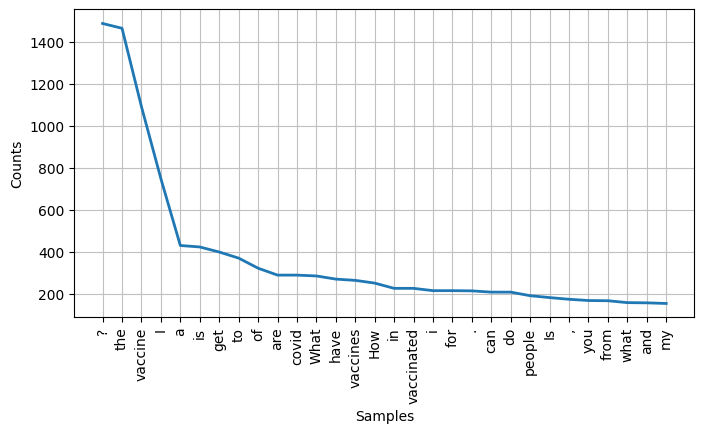

[('?', 1488), ('the', 1465), ('vaccine', 1092), ('I', 749), ('a', 431), ('is', 424), ('get', 400), ('to', 371), ('of', 323), ('are', 290), ('covid', 290), ('What', 286), ('have', 271), ('vaccines', 265), ('How', 252), ('in', 227), ('vaccinated', 227), ('i', 216), ('for', 216), ('.', 215), ('can', 209), ('do', 209), ('people', 192), ('Is', 183), (',', 175), ('you', 169), ('from', 168), ('what', 159), ('and', 158), ('my', 155)]


In [12]:
# Plot distribution of these frequent words 
all_words = nltk.FreqDist(trust_tokenized_words)
plt.figure(figsize=(8, 4))
all_words.plot(30);
print(all_words.most_common(30))

### 2. Text Preprocessing:
    Tokenize the text into individual words or phrases.
As we can see, punctuations and other articles are highly populating the data but there's no need of these words in our further analysis. To get rid of these stopwords and punctuations, we will perform text cleaning. 
Further lemmatize or stem the text to reduce inflectional or derivational forms of words to their base form.

In [13]:
# converting text to lowercase cause corpus is case-sensitive
trust_text_lower = clean_text.lower()

#create word tokens
trust_tokenized_words = word_tokenize(trust_text_lower)

<b> Note: Performing Custom Lemmatization before stopward removal as we have similar words in different forms and it would be easy to add one stop word instead of its several forms.</b>

In [14]:
from nltk.stem import WordNetLemmatizer
# define lemmatizer
lemmatizer = WordNetLemmatizer()

# Defining a dictionary of similar words
custom_lemmas = {'vaccines': 'vaccine', 'vaccinated': 'vaccine', 'vaccination': 'vaccine', 'shot':'vaccine', 'covid':'covid-19'}

# Creating a list of lemmatized tokens
lemmatized_tokens = []
for word in trust_tokenized_words:
    if word in custom_lemmas:
        lemma = custom_lemmas[word]  # if word is in custom_lemmas, add the value of the key to "lemma"
    else:
        lemma = lemmatizer.lemmatize(word)
    lemmatized_tokens.append(lemma)

In [15]:
from nltk.corpus import stopwords
# get stopwards from the nltk corpus
stop_words = stopwords.words("english")

# check if "get" is in the stopwords list, if not add it 
if "get" in stop_words:
    print("yes")
else:
    print("no")

no


In [20]:
#Add custom stopwords to the list that top your dataset text
stop_words.extend(["vaccine", "covid-19", "get", "j", "n't", "doe", "people", "many"])

Adding "vaccine" and "covid-19" to the stopwords list because its frequency is very high and we know the conversations are all about this. The other words were explored before and just needed to be removed. <br>

<b>Challenge: As I performed lemmatization before stopwards removal, few words like "does" got converted into "doe" and then couldn't be removed as the original stopwords list doesn't contain these words. Hence, I added them manually in the stopwords list</b>

In [27]:
#Create new token list by removing the stopwords
filtered_trust_tokens1 = [word for word in lemmatized_tokens if word not in stop_words]
#add words in filtered list which are not in the stopwords list

Removing punctuations from the text

In [28]:
import string
punctuations = list(string.punctuation)

#Create another token list to store all clean tokens
filtered_trust_tokens2 = [punc for punc in filtered_trust_text1 if punc not in punctuations]

We have now cleaned the data to an extent, let us plot the distribution of words again

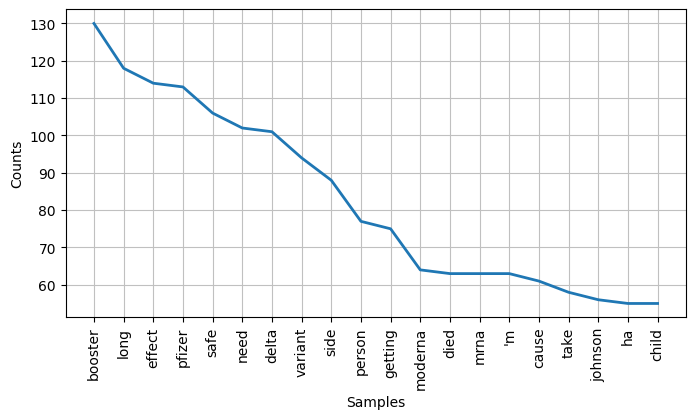

[('booster', 130), ('long', 118), ('effect', 114), ('pfizer', 113), ('safe', 106), ('need', 102), ('delta', 101), ('variant', 94), ('side', 88), ('person', 77), ('getting', 75), ('moderna', 64), ('died', 63), ('mrna', 63), ("'m", 63), ('cause', 61), ('take', 58), ('johnson', 56), ('ha', 55), ('child', 55), ('year', 54), ("'s", 51), ('still', 51), ('death', 50), ('effective', 50), ('immunity', 48), ('term', 45), ('dose', 43), ('virus', 43), ('old', 42)]


In [29]:
all_words = nltk.FreqDist(filtered_trust_tokens2)
plt.figure(figsize=(8, 4))
all_words.plot(20);
print(all_words.most_common(30))

Creating a word cloud to see most appearing words in the data after text preprocessing

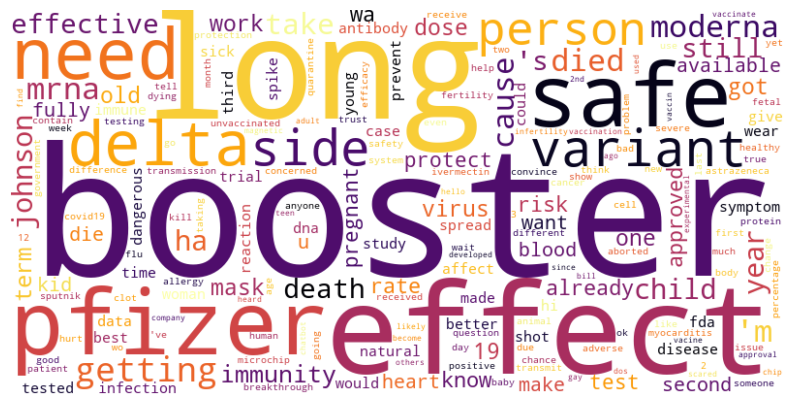

In [38]:
# Create a dictionary of word frequencies
from collections import defaultdict

word_freq = defaultdict(int)
for token in filtered_trust_tokens2:
    word_freq[token] += 1    # keeping the count of token in the dictionary - key value pair of each token and its count

# Create and customize the wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", width=800, height=400, max_words=200, colormap="inferno").generate_from_frequencies(word_freq)

# Display the wordcloud
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We know that people are highly concerned about the covid-19 vaccine, however they also want to gain knowledge about the booster dose. Apart from this, the major concerns includes the long-term effects of the two most talked over vaccines viz. pfizer and moderna. <br>
### <b>"death, die, kill, paralyse, sick, risk, reaction, infection" are the highlights of the concerns that people expressed in the chatbot conversations</b>

Lastly, we will see the word associations that are promiment in the questions asked by plotting Bigrams

In [37]:
from nltk import BigramAssocMeasures
from nltk.collocations import BigramCollocationFinder

bigram_measures = BigramAssocMeasures()  # measures for evaluating the significance of bigrams
finder = BigramCollocationFinder.from_words(filtered_trust_tokens2)

finder.nbest(bigram_measures.likelihood_ratio, 40)   # find the 40 most significant bigrams in the corpus

[('side', 'effect'),
 ('delta', 'variant'),
 ('long', 'term'),
 ('year', 'old'),
 ('wear', 'mask'),
 ('johnson', 'johnson'),
 ('spike', 'protein'),
 ('natural', 'immunity'),
 ('pregnant', 'woman'),
 ('need', 'booster'),
 ('blood', 'clot'),
 ('second', 'dose'),
 ('fetal', 'cell'),
 ('clinical', 'trial'),
 ('fda', 'approved'),
 ('adverse', 'reaction'),
 ('immune', 'system'),
 ('united', 'state'),
 ('sputnik', 'v'),
 ('protect', 'delta'),
 ('gene', 'therapy'),
 ('change', 'dna'),
 ('term', 'effect'),
 ('alter', 'dna'),
 ('chance', 'getting'),
 ('breakthrough', 'case'),
 ('bill', 'gate'),
 ('hi', 'chatbot'),
 ('multiple', 'sclerosis'),
 ('cause', 'infertility'),
 ('test', 'positive'),
 ('pharmaceutical', 'company'),
 ('hearing', 'loss'),
 ('ireland', 'london'),
 ('travel', 'ireland'),
 ('aborted', 'fetal'),
 ('heart', 'attack'),
 ('booster', 'shot'),
 ("'m", 'concerned'),
 ('heart', 'inflammation')]

### These BiGrams/TriGrams can be of great help to answer the research questions stated at the start of the report - " Here are some of the most common concerns/misconceptions about the covid-19 vaccine."

## References

1. Friedman, R., Sedoc, J., Gretz, S., Toledo, A., Weeks, R., Bar-Zeev, N., ... & Slonim, N. (2022). Viratrustdata: A trust-annotated corpus of human-chatbot conversations about covid-19 vaccines. arXiv preprint arXiv:2205.12240.

2. Michael Waskom, 2012-2022. https://seaborn.pydata.org/

3.  NLTK Project, 2023. https://www.nltk.org/